In [3]:
import requests
import re
import time
import random
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import clear_output

names = []
review_num = []
classification = []
price= []
link=[]
star=[]


base_url = "https://www.yelp.com/search?find_desc=&find_loc=Irvine%2C+CA&ns=1"
current_page = 1

start_time=time.time()
while current_page < 11:   ## suppose we want to get the first page
    print('\n')
    print('Page ', current_page)
    start = (current_page-1)*10  ## starting number add '&start=10' from page 2
       # https://www.yelp.com/search?find_desc=&find_loc=Irvine%2C%20CA&ns=1&start=10
    url = base_url + "&start=" + str(start)
    page = requests.get(url)
    if (page.status_code // 10**2) == 2 :
        print('succesffully connected!')
    else :
        print('succesffully failed!')

    ## Pause the loop
    time.sleep(random.randint(1, 5))
    
    ## Monitor the requests
    elapsed_time = time.time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(current_page, current_page/elapsed_time))
    clear_output(wait=True)

    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    section= soup.find_all('div', class_ = 'lemon--div__373c0__1mboc largerScrollablePhotos__373c0__3FEIJ arrange__373c0__UHqhV border-color--default__373c0__2oFDT')
    for container in section:
       #business name
        try:
            name=container.find('a', class_="lemon--a__373c0__IEZFH link__373c0__29943 link-color--blue-dark__373c0__1mhJo link-size--inherit__373c0__2JXk5").get_text()
       #<a class="lemon--a__373c0__IEZFH link__373c0__29943 link-color--blue-dark__373c0__1mhJo link-size--inherit__373c0__2JXk5" 
    
        except:
            name = "None"
            
        name1=re.findall('.+',name)
        name2=''.join(name1)
        names.append(name2)
         
        #review number
        try:
            review=container.find('span',class_ ="lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_").get_text().split(' ')[0]
        except:
            review=0
        reviewers_num=(int(review))
        review_num.append(reviewers_num)

        # classification
        try:
            classifications=container.find('div', class_ ="lemon--div__373c0__1mboc priceCategory__373c0__3zW0R border-color--default__373c0__2oFDT").get_text()
        except:
            classifications="None"
            
        class1=re.findall('[A-Za-z].+',classifications)
        class2=''.join(class1)
        classification.append(class2)

        #price lengh of $ ex($$$)=3
        try:
            prices=container.find('span',class_ ="lemon--span__373c0__3997G text__373c0__2pB8f priceRange__373c0__2DY87 text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_ text-bullet--after__373c0__1ZHaA").get_text()
        except:
            prices="None"
        prices2=len(prices)
        price.append(prices2)

        #link address
        try:
            link_add=container.find('a',class_ ="lemon--a__373c0__IEZFH link__373c0__29943 link-color--blue-dark__373c0__1mhJo link-size--inherit__373c0__2JXk5",
                           attrs={'href': re.compile("^/")})
        except:
            link_add="None"
        link_add2=link_add.get('href')
        link.append(link_add2)
        
        #star
        try:
            stars=container.find('span',class_ ="lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT").div
            #stars2=stars.find_all('div'):
            stars3=stars['aria-label']
            stars3=stars3.replace(" star rating","")
        except:
            stars3=0
        stars_num=(float(stars3))
        star.append(stars_num)
        
        
    del page     ## delete the current web page
    del soup     ## delete the current soup            
    current_page += 1   ## move to next page

data_df = pd.DataFrame({'name': names,
                       'review number': review_num,
                       'classification': classification,
                       'price':price,
                       'link':link,
                       'star':star
})
print(data_df.info())
data_df
#produce as a csv file
#data_df.to_csv('yelp_highrated_re.csv')
#data_df.to_excel('yelp_highrated.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
name              101 non-null object
review number     101 non-null int64
classification    101 non-null object
price             101 non-null int64
link              101 non-null object
star              101 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None


,name,review number,classification,price,link,star
0,85°C Bakery Cafe,5574,"Coffee & Tea, Bakeries, Patisserie/Cake Shop",1,/biz/85-c-bakery-cafe-irvine,4.0
1,HiroNori Craft Ramen- Irvine,2062,"Ramen, Vegan, Noodles",2,/biz/hironori-craft-ramen-irvine-irvine,4.5
2,North Italia,2657,"Pizza, Italian",2,/biz/north-italia-irvine,4.5
3,California Fish Grill,2598,"Seafood, Fish & Chips",2,/biz/california-fish-grill-irvine,4.0
4,Fukada,2470,Japanese,2,/biz/fukada-irvine,4.0
5,Le Diplomate Cafe,1741,"Bakeries, Sandwiches, Cafes",1,/biz/le-diplomate-cafe-irvine,4.5
6,House of Shabu Shabu,2229,"Japanese, Hot Pot",2,/biz/house-of-shabu-shabu-irvine,4.0
7,Kang Ho Dong Baekjeong,1240,"Korean, Barbeque",2,/biz/kang-ho-dong-baekjeong-irvine-2,4.5
8,Ruth’s Chris Steak House,1493,Steakhouses,3,/biz/ruths-chris-steak-house-irvine-2,4.0
9,Duck Donuts,653,"Donuts, Desserts, Ice Cream & Frozen Yogurt",4,/biz/duck-donuts-irvine,5.0


In [4]:
#reviews = []
sidebar = {}
linknum = 0
for link_item in link:       
    s_url = 'https://www.yelp.com' + link_item #+'?start=20'
    s_page = requests.get(s_url)
    if (s_page.status_code // 10**2) == 2 :
        print('succesffully connected!')
    else :
        print('succesffully failed!')
    ## Pause the loop
    #time.sleep(random.randint(1, 5))

    ## Monitor the requests
    elapsed_time = time.time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(current_page, current_page/elapsed_time))
    clear_output(wait=True)

    s_page = requests.get(s_url)
    s_soup = BeautifulSoup(s_page.text, 'html.parser')
    
    ## Sidebar informations
    sidebar_info = s_soup.find_all('dl')
    for sidebar_item in sidebar_info:
        sb_key = sidebar_item.dt.text.strip()
        sb_value = sidebar_item.dd.text.strip()
        sidebar.update({sb_key:sb_value})
    if linknum is 0:
        s_df = pd.DataFrame(sidebar, index=[linknum])
    temp_df = pd.DataFrame(sidebar, index=[linknum])
    s_df = pd.merge(s_df, temp_df, how='outer')
    
    ## Reviews
    #review = s_soup.find_all('p', lang="en")
    #reviews.append(review)
    ## Reviews test
    #print("Link# :", linknum, review)
    
    ## link# counter:
    linknum += 1

##  Add name to the s_df table, DELETE ['name'].to_frame() for the full table
s_df = data_df['name'].to_frame().join(s_df, how='outer')

s_df

#produce as a csv file
#s_df.to_csv('restaurant_detail.csv')
#s_df.to_excel('restaurant_detail.xlsx')
#with open("restaurant_review.csv",'wb') as resultFile:
    #wr = csv.writer(resultFile, dialect='excel')
    #wr.writerows(review)
#'''

,name,Today,Price range,Delivery,Take-out,Accepts Credit Cards,Accepts Apple Pay,Accepts Google Pay,Parking,Bike Parking,...,Offers Military Discount,Open to All,Good For Dancing,Best Nights,Smoking,By Appointment Only,Coat Check,Has Pool Table,Dairy-Free Options,Kids Activities Nearby
0,85°C Bakery Cafe,6:30 am - 11:00 pm\nOpen now,Inexpensive,No,Yes,Yes,Yes,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HiroNori Craft Ramen- Irvine,11:00 am - 10:00 pm\nOpen now,$11-30,No,Yes,Yes,No,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North Italia,11:00 am - 10:00 pm\nOpen now,$11-30,No,Yes,Yes,Yes,No,"Valet, Garage, Private Lot",Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California Fish Grill,11:00 am - 9:30 pm\nOpen now,$11-30,Yes,Yes,Yes,No,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fukada,11:30 am - 2:00 pm5:00 pm - 9:00 pm\nClosed now,$11-30,No,Yes,Yes,No,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Le Diplomate Cafe,8:00 am - 9:00 pm\nOpen now,Under $10,No,Yes,Yes,No,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,House of Shabu Shabu,11:30 am - 12:00 am\nOpen now,$11-30,No,Yes,Yes,No,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kang Ho Dong Baekjeong,11:00 am - 12:00 am\nOpen now,$11-30,No,No,Yes,No,No,Private Lot,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ruth’s Chris Steak House,5:00 pm - 10:00 pm\nClosed now,$31-60,No,Yes,Yes,No,No,"Valet, Private Lot",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Donuts,6:30 am - 9:00 pm\nOpen now,$31-60,No,Yes,Yes,No,No,Private Lot,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_col = pd.merge(data_df, s_df, on='name')
df_col.to_csv('restaurant_detail.csv')

In [6]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [7]:
class_counts ={}
for items in df_col.loc[:,'classification']:
    item = items.split(", ")
    for rest_type in item:
        class_counts[rest_type] = class_counts.get(rest_type, 0)+1

In [8]:
a_df=pd.DataFrame(class_counts, index=['Count']).T

In [9]:
a_df.sort_values(by='Count',ascending=False) 
#what restaurant classification have the most in the area.

,Count
American (New),13
Japanese,11
Sandwiches,10
Burgers,9
Breakfast & Brunch,9
Coffee & Tea,8
Korean,8
Desserts,8
Ice Cream & Frozen Yogurt,7
Noodles,7


No handles with labels found to put in legend.


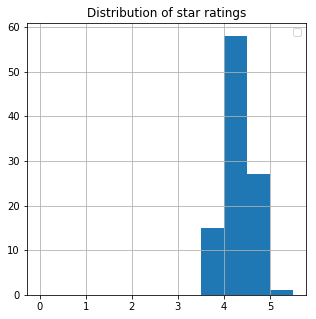

In [14]:
import pandas as pd
import numpy as np
# star histogram
bin_values = np.arange(start=0, stop=6, step = .5)
df_col['star'].hist(bins=bin_values, figsize = (5,5))
plt.title("Distribution of star ratings")

Text(0.5, 1.0, 'Distribution of price categories')

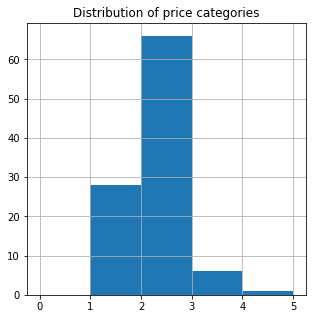

In [15]:
# price histogram
bin_values = np.arange(start=0, stop=6, step = 1)
df_col['price'].hist(bins=bin_values, figsize = (5,5))
plt.title("Distribution of price categories")